# HR DATA ANALYSIS PROJECT - Group 16

# CHAPTER 1 - EXPLORATORY DATA ANALYSIS 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('HR_comma_sep.csv', sep=',')
employeeData=train_data.copy(deep=True)

# ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5year','departmennt','salary','left']

In [3]:
train_data_backup = train_data
train_data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departmennt,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1
6,0.10,0.77,6,247,4,0,0,sales,low,1
7,0.92,0.85,5,259,5,0,0,sales,low,1
8,0.89,1.00,5,224,5,0,0,sales,low,1
9,0.42,0.53,2,142,3,0,0,sales,low,1


# FILL MISSING VALUES

In [4]:
train_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


No missing values so Good news! Every column has 14999 records

<h1>Box Plots</h1>

Since Work_accident, left, and promotion_last_5_years are binary attributes, there is nothing meaningful we can look at by visualizing them, so we've excluded their plots

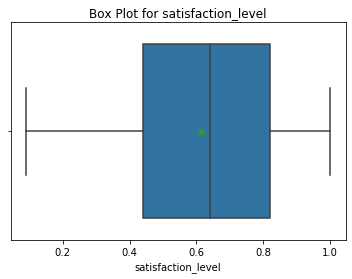

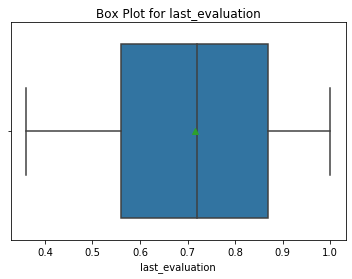

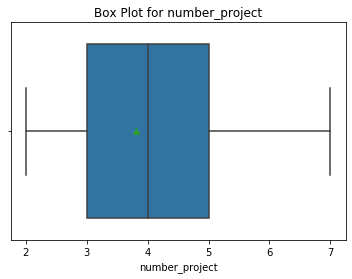

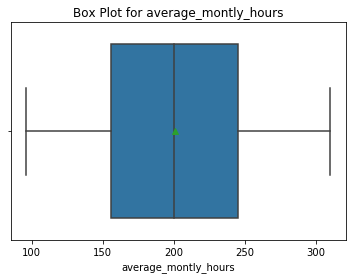

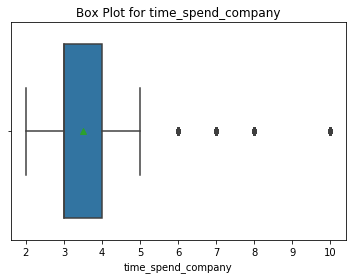

In [5]:
columnNames=list(train_data.columns)
# sns.boxplot('time_spend_company','last_evaluation', data=train_data)
# plt.show()
# sns.boxplot('time_spend_company','satisfaction_level', data=train_data)
columnNames.remove('Work_accident')
columnNames.remove('promotion_last_5years')
columnNames.remove('left')
for column in columnNames:
    
    if train_data[column].dtype=="int64" or train_data[column].dtype=="float64":
        plt.title("Box Plot for "+column)
        sns.boxplot(column, data=train_data, showmeans=True)
        plt.show()

# Correlation

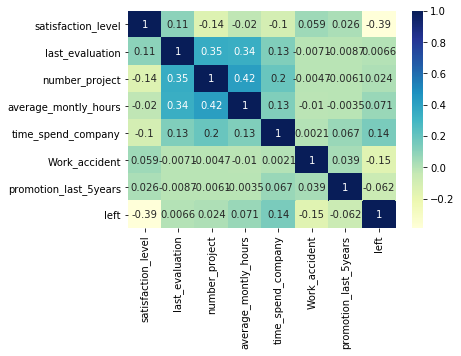

In [7]:
correlation = train_data.corr()
ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")

Corr analysis: Those with higher last evaluation (highly rated employees) worked on more projects, this shows the company's way of evaluating their employees. The more work you do, the higher your rating by the higher ups. 
However, satisfaction level is negatively correlated with the number of projects. The more work you do, you're less likely to be satisfied, so we can investigate this further as well later. 
There is also a slight correlation with the time spent in the company and the number of hours/projects you work, it seems the more experience you gain, the more likely the company is willing to trust you with projects.

<h1> Factor(s) Affecting Employee Retention </h1>

In [8]:
#Dividing the dataset into employees that stayed and those that left

stayedEmployees=train_data[train_data.left==0]
leftEmployees=train_data[train_data.left==1]

leftEmployees.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departmennt,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1
6,0.10,0.77,6,247,4,0,0,sales,low,1
7,0.92,0.85,5,259,5,0,0,sales,low,1
8,0.89,1.00,5,224,5,0,0,sales,low,1
9,0.42,0.53,2,142,3,0,0,sales,low,1


In [11]:
leftEmployees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.0
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,0.0
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.0
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.0
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,1.0
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,1.0
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.0


In [12]:
stayedEmployees.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.0
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889,0.0
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.0
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,0.0
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,0.0
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,0.0


From this already we can see some indicator as to why employees could be leaving. Their average monthly hours seem to be alot, yet it's not reflected in their salary. Let's visualize some relations.

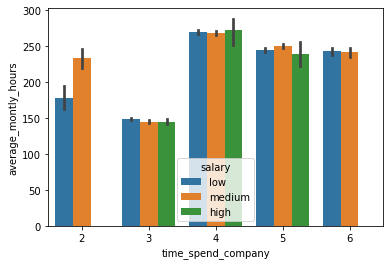

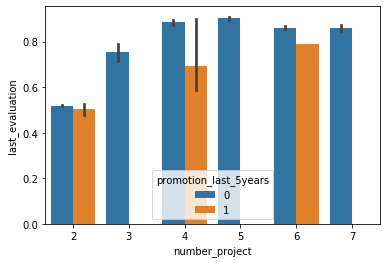

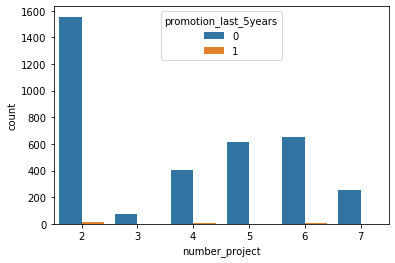

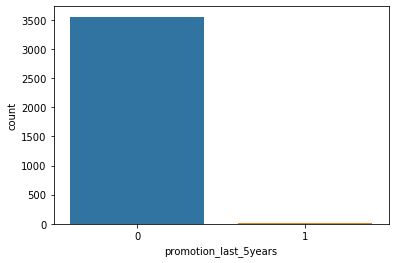

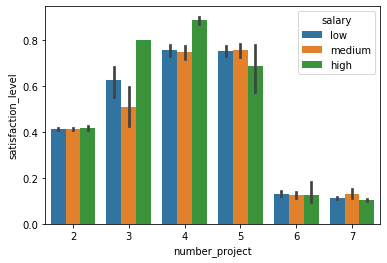

In [14]:
sns.barplot('time_spend_company', 'average_montly_hours', hue="salary", data=leftEmployees)
plt.show()

sns.barplot('number_project', 'last_evaluation', hue="promotion_last_5years", data=leftEmployees)
plt.show()

sns.countplot('number_project', hue='promotion_last_5years', data=leftEmployees)
plt.show()

sns.countplot('promotion_last_5years', data=leftEmployees)
plt.show()

sns.barplot('number_project', 'satisfaction_level', hue="salary", data=leftEmployees)
plt.show()

<strong>It looks to be so far that despite working a lot, being rated highly, employees weren't getting promoted eventually leading to them leaving.</strong>

Looking at the plots, We see that there hardly any promotions from the subset of employees that left. 
We also see that the number of projects is a contributing factor. Less number of projects mean they are being less engaged and want more work. However, 5 or more projects could also leave to employees leaving. 3-4 projects seems to be the balance

<strong> We can check using more countplots. </strong>

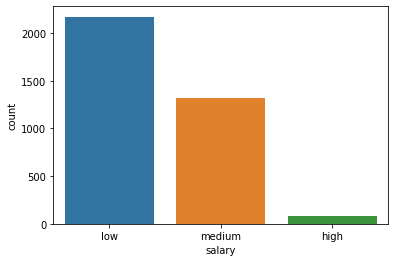

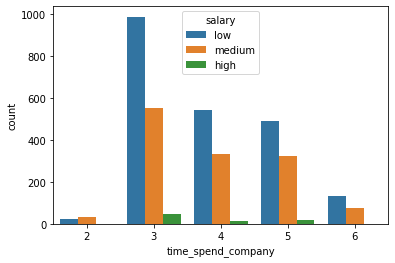

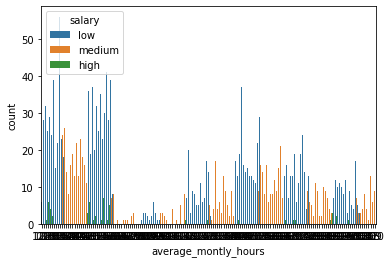

In [8]:
sns.countplot('salary', data=leftEmployees)
plt.show()

#People with lower-medium salaries left more. 

sns.countplot('time_spend_company', hue='salary', data=leftEmployees)
plt.show()

sns.countplot('average_montly_hours', hue='salary', data=leftEmployees)

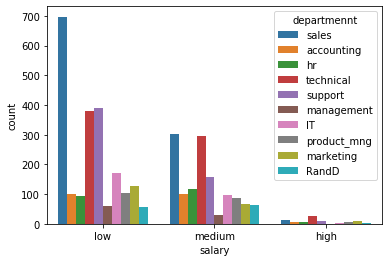

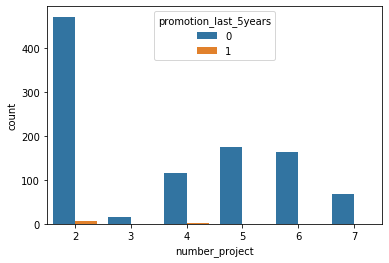

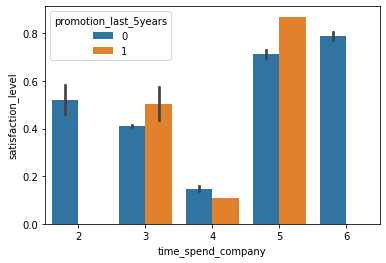

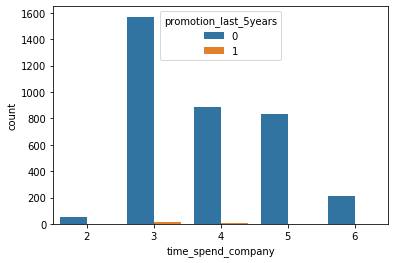

In [32]:
sns.countplot('salary', hue="departmennt", data=leftEmployees)
plt.show()

salesEmployeesLeft= leftEmployees[leftEmployees.departmennt=="sales"]
sns.countplot('number_project', hue="promotion_last_5years", data=salesEmployeesLeft)
plt.show()

sns.barplot("time_spend_company","satisfaction_level", hue="promotion_last_5years", data=leftEmployees)
plt.show()

sns.countplot("time_spend_company", hue="promotion_last_5years", data=leftEmployees)
plt.show()

Looking at it department-wise, the people at the sales department have left the most following the trends for salary. However, the sales people follow similar trends for rest of the data i.e. high number of projects, lower salaries, so we can ignore department for our analysis.

The countplots give us a better indication of what's going on. Like we see here, the 3 years mark is the peak time where employees seem to be leaving.
And the majority case again we see is the lack of promotions. Also, an employee is less likely to leave if theyve spent more than 6 years in the company.
However, promotions seem to be a big factor in employee retention.

Also to put the department analysis to rest, we look at the plots for employees that stayed and employees that left department-wise:

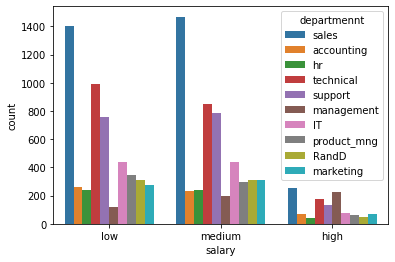

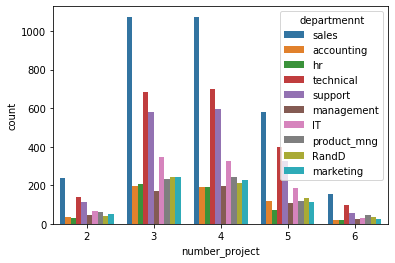

In [11]:
sns.countplot('salary', hue='departmennt', data=stayedEmployees)
plt.show()

sns.countplot('number_project', hue='departmennt', data=stayedEmployees)

Most of the employeee force it seems belongs to the sales department, so it's normal to see more people from sales leaving the company as well.
Therefore, we can disregard department-wise analysis as not having much impact on employee retention as comparied to low salary, number of promotions, and workload.

The below scatterplot visualizes the employees that left, some had low satisfaction levels because they were getting too <em> less </em> work

some left because of <em> too much </em> work
Whilst others were content with their work but let's look at satisfaction level and promotions to explain why those people left.

As you see, even those with HIGH satisfaction levels eventually left due to a lack of promotion. 
Lastly, we checked using the "hue" characteristic in the scatterplot. Hardly an one of them got promoted. 

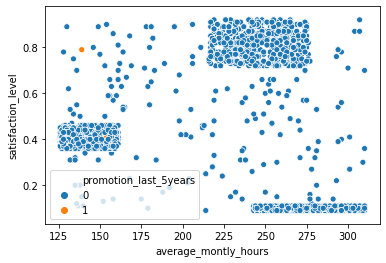

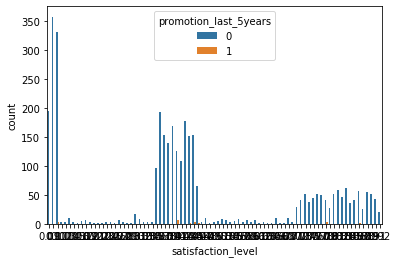

In [17]:
sns.scatterplot('average_montly_hours', 'satisfaction_level', hue="promotion_last_5years", data=leftEmployees)
plt.show()

sns.countplot('satisfaction_level', hue='promotion_last_5years',data=leftEmployees)
plt.show()

Previously, we saw that the employees that had high number of projects and high rating by the company were still leaving. The current evidence seen so far alongside the plot itself showed that a lack of promotions was to do with this, but we can verify using an informative scatter plot.

Again, we see hardly anyone got promoted even those that took up <strong> more </strong> projects and had <strong> high </strong> evaluations

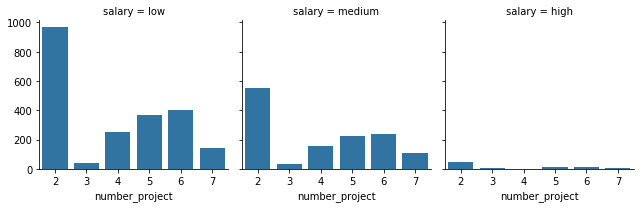

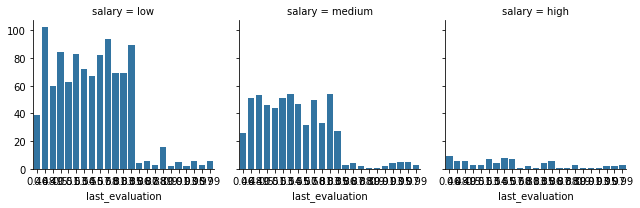

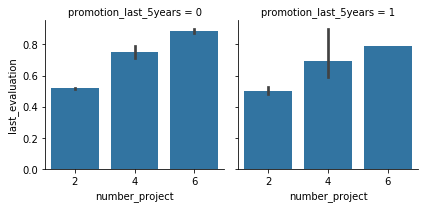

In [64]:
g=sns.FacetGrid(leftEmployees,col="salary")
g.map(sns.countplot, 'number_project')

plt.show()
g=sns.FacetGrid(leftEmployees, col='salary')
g.map(sns.countplot, 'last_evaluation')

plt.show()
g=sns.FacetGrid(leftEmployees,col="promotion_last_5years")
g.map(sns.barplot, 'number_project', 'last_evaluation')

plt.show()


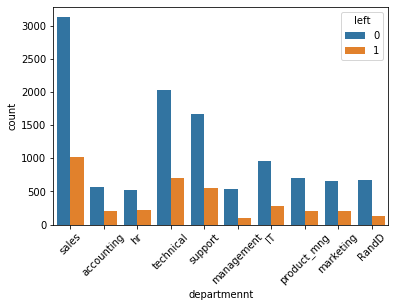

In [53]:
ax= sns.countplot('departmennt', hue='left', data=train_data)
rotate=ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

<h1> Summary of attributes having an impact on employee retention </h1>

<ul>
    <li> Employees are getting overworked, they have high number of projects, high working hours.
    <li> Some employees are under-working, they should work on more projects. It seems 3-5 seems to be the right number of projects to give.
    <li> Most people that have left have low-medium tier salaries.
    <li> Perhaps the most important attribute is promotion. Employees are less likely to leave if they get promoted in the last 5 years. 
    <li> Employees are more likely to leave around the 3-year mark.
    <li> High satisfaction is not enough, promotion matters. Even if employee is rated highly by the employee and is doing good work, if they don't get promoted or get paid relatively well they will leave.
    <li> the ratio of employees that say and leave department-wise is same so there seems to be no relation to employee retention when it comes to department (as seen in the sell directly above).
    
</ul>

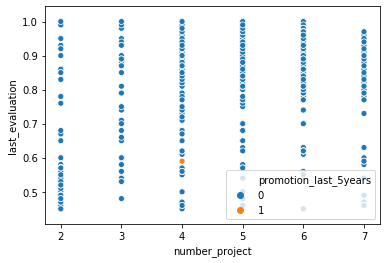

In [19]:
sns.scatterplot('number_project', 'last_evaluation', hue='promotion_last_5years',data=leftEmployees)

<h1>Dependency between categorical and numerical. </h1>

<ul>
 <li>Most people have 3-4 projects after that it starts to decrease. 
 <li>The avg monthly hours are similar for all salary types, the number of high-paid people is much less in comparison to other salary tiers. 
 <li>Count plot gives a better idea. Despite high hours, there are less high salary people to match that.
 <li>Lower salaried people left more. (Check above countplot for salary)
 <li>Ther seems to be no dependency between salary and the time you spend in a company, more experience may not lead to a high salary. 
</ul>

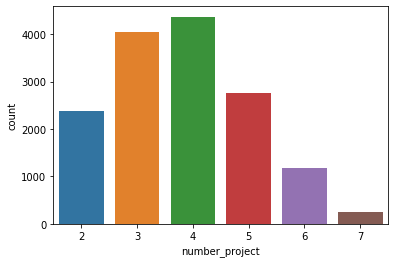

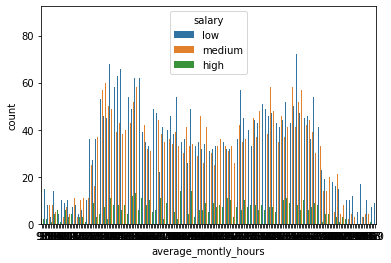

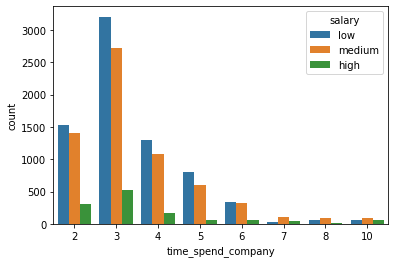

In [20]:
sns.countplot('number_project', data=train_data)
plt.show()


sns.countplot('average_montly_hours', hue="salary" ,data=train_data)
plt.show()


sns.countplot('time_spend_company', hue='salary', data=train_data)
plt.show()


<ul>
<li> There is a slight dependency between satisfaction level and salary. 
<li> You're more likely to receive a high salary if you take up more work, from 3-5 projects as seen in the plot. 
<li> More Sales people in the company overall.
<li> People in management department tend to have more experience (stay longer). 
</ul>

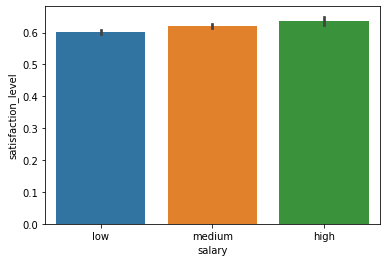

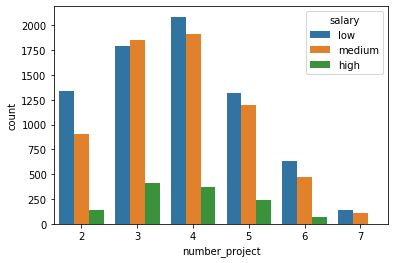

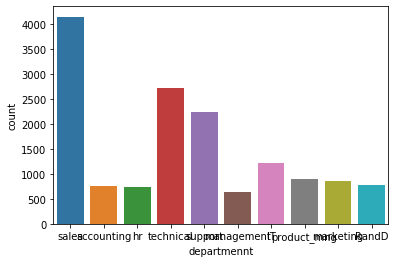

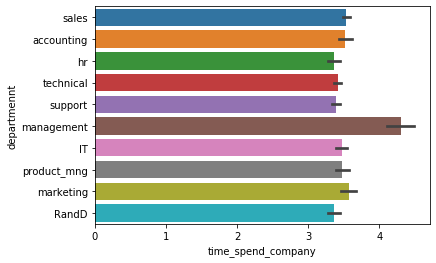

In [33]:
sns.barplot('salary','satisfaction_level',data=train_data)
plt.show()

sns.countplot('number_project', hue='salary', data=train_data)
plt.show()

sns.countplot('departmennt',data=train_data)
plt.show()

sns.barplot('time_spend_company', 'departmennt', data=train_data)